## Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

#### Consider only the below columns and prepare a prediction model for predicting Price.

###### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### 2. Importing Dataset

In [3]:
startups_data = pd.read_csv('50_Startups.csv')
startups_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### 3. EDA

In [4]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups_data_1 = startups_data.rename({'R&D Spend':'RDS','Marketing Spend':'Marketing_Spend'},axis=1)
startups_data_1

,RDS,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
startups_data_1.describe()

,RDS,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# Correlation Analysis
startups_data_1.corr()

,RDS,Administration,Marketing_Spend,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


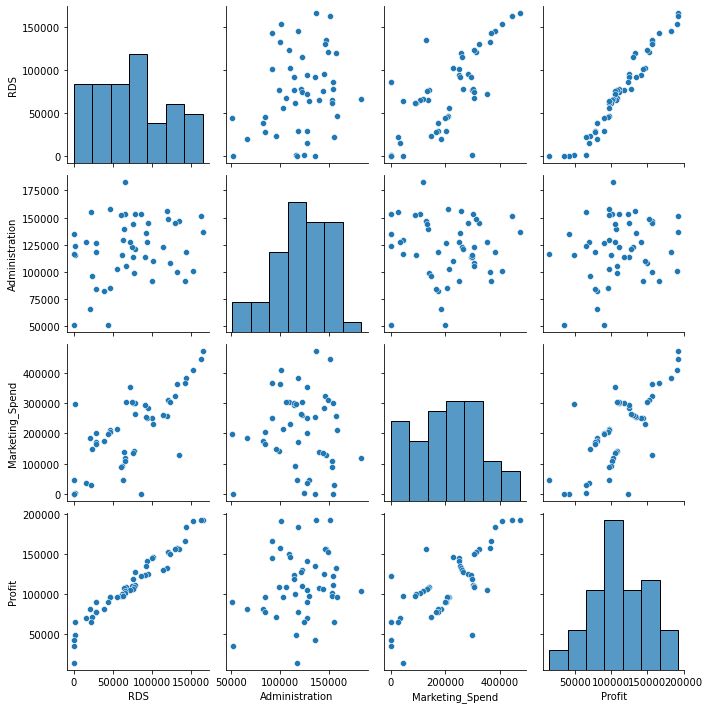

In [8]:
sns.pairplot(startups_data_1)
plt.show()

### 4. Model Building

In [9]:
model = smf.ols("Profit~RDS+Administration+Marketing_Spend",data=startups_data_1).fit()

### 5. Model Testing

In [10]:
model.params #co-eff parameters

Intercept          50122.192990
RDS                    0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [11]:
np.round(model.tvalues,4), np.round(model.pvalues,6) #tvalues & pvalues

(Intercept           7.6262
 RDS                17.8464
 Administration     -0.5255
 Marketing_Spend     1.6551
 dtype: float64,
 Intercept          0.000000
 RDS                0.000000
 Administration     0.601755
 Marketing_Spend    0.104717
 dtype: float64)

In [12]:
np.round(model.rsquared,4), np.round(model.rsquared_adj,4) # finding r-squared

(0.9507, 0.9475)

In [13]:
# Building MLR model for insignificant variables 'Administration' and 'Marketing_Spend'
# Also find their tvalues and pvalues

In [21]:
mlr= smf.ols('Profit~Administration+Marketing_Spend',data=startups_data_1).fit()
mlr.tvalues, np.round(mlr.pvalues,7)

(Intercept          1.142741
 Administration     2.467779
 Marketing_Spend    8.281039
 dtype: float64,
 Intercept          0.258934
 Administration     0.017292
 Marketing_Spend    0.000000
 dtype: float64)

### 6. Model Validation

In [23]:
startups_data_1.head()

,RDS,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
# 1) Collinearity check
rsq_RDS = smf.ols("RDS~Administration+Marketing_Spend",data=startups_data_1).fit().rsquared
vif_RDS = 1/(1-rsq_RDS)

rsq_Administration = smf.ols("Administration~RDS+Marketing_Spend",data=startups_data_1).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketing_Speed = smf.ols("Marketing_Spend~RDS+Administration",data=startups_data_1).fit().rsquared
vif_Marketing_Speed = 1/(1-rsq_Marketing_Speed)

# Putting the values in Dataframe format
startups_data_2={'Variables':['RDS','Administration','Marketing_Spend'],'Vif':[vif_RDS,vif_Administration,vif_Marketing_Speed]}
Vif_df=pd.DataFrame(startups_data_2)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


###### VIF !> 20, hence no collinearity

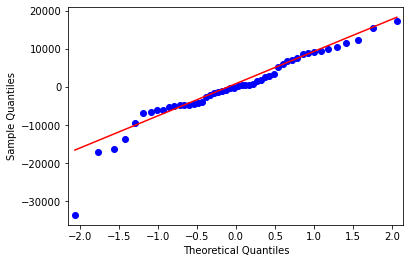

In [32]:
# 2) Residual Check using Q-Q plot

import statsmodels.api as sm

sm.qqplot(model.resid,line='q')
plt.show()